## Monthly Job Demand

In [ ]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
pd.to_datetime(df['job_posted_date'])

#Updating the dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Creating datasets backup

In [23]:
df_uk = df[df['job_country'] == 'United Kingdom'].copy()


## Extracting Months as Str from Date 

In [24]:
df_uk['job_months'] = df_uk['job_posted_date'].dt.strftime('%B')

## Pivot table

In [ ]:
# size as count always work columns not values
count_pt = df_uk.pivot_table(index='job_months', columns='job_title_short', aggfunc='size')

## Ordering by Months

In [26]:
count_pt.reset_index(inplace=True)
count_pt['month_number'] = pd.to_datetime(count_pt['job_months'], format='%B').dt.month
count_pt.sort_values('month_number', inplace=True)
count_pt.set_index('job_months',inplace=True)
count_pt.drop(columns='month_number',inplace=True)

# Any error = Run All

## Filter the top 3 

In [36]:
# filtering the top countries that have the highest counts
top_3 = df_uk['job_title_short'].value_counts().head(3)
# make it as a list
top_3 = top_3.index.to_list()

## Visualization

<Axes: title={'center': 'Monthly Job Demand in UK'}, xlabel='Months', ylabel='Job Count'>

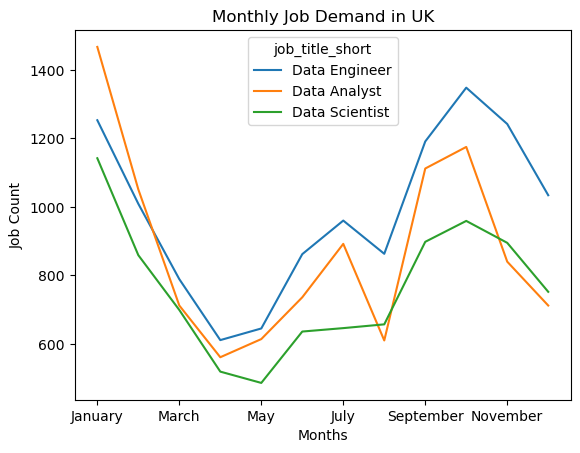

In [39]:
count_pt[top_3].plot(kind='line', title='Monthly Job Demand in UK', xlabel='Months', ylabel='Job Count')